In [1]:
import pandas as pd

from src.preprocessing.text_preprocessing import TextPreprocessor
df = pd.read_csv('/home/pablo/active-learning-pablo/data/datasets/cflw_large2_with_trees.csv', on_bad_lines='warn')
#df = pd.read_csv('/home/pablo/active-learning-pablo/cflw_large_with_trees.csv', on_bad_lines='warn')

In [2]:
df.head()

,page_created_at,host_id,page_id,page_version_id,RelatedTagsArray,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html,tree
0,2018-11-26 12:56:36,59895,40.0,26837.0,"['Bitcoin (BTC)', 'English', 'Financial Crime'...",0.0,0.0,1.0,0.0,0.0,0.0,\n\n\n100x Your Coins in 24 Hours - Officially...,{html {head meta meta meta meta title link li...
1,2018-11-27 00:02:10,59906,44.0,46435.0,"['English', 'Financial Crime', 'Gambling', 'Ma...",0.0,0.0,1.0,0.0,0.0,0.0,\n\nHACK-HELP\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nM...,{html {head title link link meta meta link li...
2,2018-03-27 02:31:35,59930,48.0,22406700.0,"['Community', 'Cybercrime', 'Forum', 'Gerki Ma...",1.0,0.0,0.0,0.0,0.0,0.0,\n\n\n\n\n\n\n\n\n\nGerki - ÃÂ¥ÃÂ°ÃÂºÃÂµÃ...,{html {head style meta meta meta base script ...
3,2018-11-26 11:36:05,60064,86.0,17558.0,"['Cannabis', 'Community', 'Drugs / Narcotics',...",0.0,1.0,0.0,0.0,0.0,0.0,\n\n\n\nCGMC\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\...,{html {head meta title link link style} {body...
4,2018-11-26 11:44:01,60073,88.0,18512.0,"['Carding', 'Credit Cards', 'English', 'Financ...",0.0,0.0,1.0,0.0,0.0,0.0,\n0day 1337day Agreement - 0day 1337day Inj3...,{html {head meta title meta meta link link li...


In [3]:
df.columns.values

array(['page_created_at', 'host_id', 'page_id', 'page_version_id',
       'RelatedTagsArray', 'Cybercrime', 'Drugs / Narcotics',
       'Financial Crime', 'Goods and Services', 'Sexual Abuse',
       'Violent Crime', 'html', 'tree'], dtype=object)

In [6]:
from __future__ import division, unicode_literals 
import codecs
import bs4

f=codecs.open("/home/pablo/active-learning-pablo/data/datasets/script_data_v2/html/48_1972_4885.html", 'r', 'utf-8')
document= bs4.BeautifulSoup(f.read()).get_text()
print(document)








Mobile Store - Best unlocked cell phones - Buy apple and samsung phones with Bitcoin




    

Login
Register
FAQs
About us
Products


Iphone 7iPhone 7
Original box with all cables etc, new and UNLOCKED
Select USA or EU depending on which region you are from.



ProductPriceQuantity




Iphone 7 128gb Jet Black USA350 USD = 0.085 ฿



 X 


Iphone 7 256gb Gold USA380 USD = 0.092 ฿



 X 


Iphone 7 128gb Jet Black EU350 USD = 0.085 ฿



 X 


Iphone 7 256gb Gold EU380 USD = 0.092 ฿



 X 



Samsung Galaxy S8ï»¿Samsung Galaxy S8 new and original box with all cables etc, UNLOCKED
Select USA or EU depending on which region you are from.


ProductPriceQuantity




Samsung Galaxy S8 Black USA290 USD = 0.070 ฿



 X 


Samsung Galaxy S8 Plus Black USA335 USD = 0.081 ฿



 X 


Samsung Galaxy S8 Black EU290 USD = 0.070 ฿



 X 


Samsung Galaxy S8 Plus Black EU335 USD = 0.081 ฿



 X 





Mobile Store






In [7]:
df['RelatedTagsArray'] = df['RelatedTagsArray'].str.split(',')
df['RelatedTagsArray'][:10]

0    [Bitcoin (BTC), English, Financial Crime, Gamb...
1    [English, Financial Crime, Gambling, Match Fix...
2    [Community, Cybercrime, Forum, Gerki Market, H...
3    [Cannabis, Community, Drugs / Narcotics, Engli...
4    [Carding, Credit Cards, English, Financial Cri...
5    [Bitcoin (BTC), English, Financial Crime, Gamb...
6    [Bulletproof Hosting Provider, Cybercrime, Eng...
7    [Counterfeit, Documents, English, Fake ID, Goo...
8    [Bulletproof Hosting Provider, Cybercrime, Eng...
9    [Carding, Credit Cards, English, Financial Cri...
Name: RelatedTagsArray, dtype: object

In [8]:
df['RelatedTagsArray'][0] #.index('English')


['Bitcoin (BTC)',
 'English',
 'Financial Crime',
 'Gambling',
 'Maltese',
 'Money Laundering',
 'Ponzi Scheme',
 'Service Provider']

In [9]:
abuse_labels = [
        'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime']
""""
labels = [[0,0,0,0,0,0]]
original = [[0,0,0,0,0,0]]
for i in range(len(df['TagArray'])-1):
    labels = labels + original
print(len(labels))
"""
for i in abuse_labels:
    df[i] = 0

In [10]:
df_copy = df.filter(['host_id', 'page_id', 'page_version_id','RelatedTagsArray', 'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime'], axis=1)
df_copy.head()

,host_id,page_id,page_version_id,RelatedTagsArray,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime
0,59895,40,26837,"[Bitcoin (BTC), English, Financial Crime, Gamb...",0,0,0,0,0,0
1,59906,44,46435,"[English, Financial Crime, Gambling, Match Fix...",0,0,0,0,0,0
2,59930,48,22406700,"[Community, Cybercrime, Forum, Gerki Market, H...",0,0,0,0,0,0
3,60064,86,17558,"[Cannabis, Community, Drugs / Narcotics, Engli...",0,0,0,0,0,0
4,60073,88,18512,"[Carding, Credit Cards, English, Financial Cri...",0,0,0,0,0,0


In [11]:
for i in range(len(df_copy['RelatedTagsArray'])):
    for label in abuse_labels:
        if label in df_copy['RelatedTagsArray'][i]:
            df_copy[label][i] = 1
df_copy

/tmp/ipykernel_1472194/2574799822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[label][i] = 1


KeyboardInterrupt: 

In [ ]:
#df_copy.sum()[-6:]

In [ ]:
documents = []
df_copy['html'] = '-'
df_copy['tree'] = '-'
df_copy['hash'] = '-'
folder_path = '/home/pablo/active-learning-pablo/data/datasets/script_data_v2/html/'
df_copy.head()

,host_id,page_id,page_version_id,RelatedTagsArray,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html,tree
0,59895,40,26837,"[Bitcoin (BTC), English, Financial Crime, Gamb...",0,0,1,0,0,0,-,-
1,59906,44,46435,"[English, Financial Crime, Gambling, Match Fix...",0,0,1,0,0,0,-,-
2,59930,48,22406700,"[Community, Cybercrime, Forum, Gerki Market, H...",1,0,0,0,0,0,-,-
3,60064,86,17558,"[Cannabis, Community, Drugs / Narcotics, Engli...",0,1,0,0,0,0,-,-
4,60073,88,18512,"[Carding, Credit Cards, English, Financial Cri...",0,0,1,0,0,0,-,-


In [ ]:
df_copy.shape

(151676, 12)

In [ ]:
df = df_copy.copy(deep = True)

In [ ]:


def bs42element_tree( parent ) :
	""" Return the structure of an HTML page as a tree with only the element names """
	if isinstance( parent, bs4.BeautifulSoup ) :
		return ''.join( bs42element_tree( child ) for child in parent.children )
	if isinstance( parent, bs4.Doctype ) :
		return ''
	if isinstance( parent, bs4.element.Comment ) :
		return ''
	if isinstance( parent, bs4.element.NavigableString ) :
		return ''
	parent_name = parent.name
	children = ''.join( bs42element_tree( child ) for child in parent.children )
	if len( children ) == 0 :
		return f' {parent_name}'
	return ' {' + parent_name + children + '}'


In [ ]:
from os.path import exists
import sys
import hashlib
sys.setrecursionlimit( 10000 )

count_found = 0
count_copied = 0

for i in range(len(df_copy['RelatedTagsArray'])):

    file = str(df_copy.loc[i,'host_id']) + '_' + str(df_copy.loc[i,'page_id']) + '_' + str(df_copy.loc[i,'page_version_id']) + '.html'
    file_path = folder_path + file
    if  exists(file_path):
        count_found += 1
        #f=codecs.open(file_path, 'r', 'utf-8')
        df_copy.loc[i,'html'] = bs4.BeautifulSoup(codecs.open(file_path, 'r', 'utf-8').read()).get_text()
        df_copy.loc[i,'tree'] = bs42element_tree(bs4.BeautifulSoup(codecs.open(file_path, 'r', 'utf-8').read()))
        df_copy.loc[i,'hash'] = hashlib.md5(codecs.open(file_path, 'r', encoding = 'utf-8').read().encode('utf-8')).hexdigest()
        count_copied += 1

print('Found files: ', count_found)
print('Copied files: ', count_copied)

Found files:  97538
Copied files:  97538


In [ ]:
df_copy.head()

,host_id,page_id,page_version_id,RelatedTagsArray,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html,tree
0,59895,40,26837,"[Bitcoin (BTC), English, Financial Crime, Gamb...",0,0,1,0,0,0,\n\n\n100x Your Coins in 24 Hours - Officially...,{html {head meta meta meta meta title link li...
1,59906,44,46435,"[English, Financial Crime, Gambling, Match Fix...",0,0,1,0,0,0,\n\nHACK-HELP\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nM...,{html {head title link link meta meta link li...
2,59930,48,22406700,"[Community, Cybercrime, Forum, Gerki Market, H...",1,0,0,0,0,0,\n\n\n\n\n\n\n\n\n\nGerki - ÃÂ¥ÃÂ°ÃÂºÃÂµÃ...,{html {head style meta meta meta base script ...
3,60064,86,17558,"[Cannabis, Community, Drugs / Narcotics, Engli...",0,1,0,0,0,0,\n\n\n\nCGMC\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\...,{html {head meta title link link style} {body...
4,60073,88,18512,"[Carding, Credit Cards, English, Financial Cri...",0,0,1,0,0,0,\n0day 1337day Agreement - 0day 1337day Inj3...,{html {head meta title meta meta link link li...


In [ ]:
df_copy.to_csv(r'C:\Users\Pablo\OneDrive\Desktop\Pablo\uni\tfm\code\active-learning-pablo\data\datasets\cflw_large_with_trees.csv', index=False)

In [ ]:
print('shape before dropping: ', df_copy.shape)
#df_copy['html'] = html_list
df_copy = df_copy.dropna()
df_copy = df_copy.drop(df_copy[df_copy["html"].map(len) == 0].index)
df_copy = df_copy.drop(df_copy[df_copy["html"] == '-'].index)
df_copy = df_copy.drop(df_copy[df_copy["tree"].map(len) == 0].index)
df_copy = df_copy.drop(df_copy[df_copy["tree"] == '-'].index)
df_copy = df_copy.drop(df_copy[df_copy["hash"].map(len) == 0].index)
df_copy = df_copy.drop(df_copy[df_copy["hash"] == '-'].index)
print('shape after removing empty: ', df_copy.shape)

df_copy = df_copy.drop_duplicates(subset=['html'], keep='first')
print("\n-Number of remainig samples after deduplication of html text", df_copy.shape)

df_copy = df_copy.drop_duplicates(subset=['tree'], keep='first')
print("\n-Number of remainig samples after deduplication of html tree", df_copy.shape)

df_copy = df_copy.drop_duplicates(subset=['hash'], keep='first')
print("\n-Number of remainig samples after deduplication of html hash", df_copy.shape)
#data_path_prepped = fw.get_dataset_checkpoint_path("prepped")
#df.to_csv(data_path_prepped, index=False, escapechar="\\")

shape before dropping:  (151676, 12)
shape after removing empty:  (97528, 12)

-Number of remainig samples after deduplication of html text (97528, 12)

-Number of remainig samples after deduplication of html tree (97528, 12)


In [22]:
df_copy.head()
df_copy.to_csv(r'C:\Users\Pablo\OneDrive\Desktop\Pablo\uni\tfm\code\active-learning-pablo\data\datasets\cflw_large_with_trees.csv', index=False)


,host_id,page_id,page_version_id,RelatedTagsArray,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html,tree
0,59895,40,26837,"[Bitcoin (BTC), English, Financial Crime, Gamb...",0,0,1,0,0,0,\n\n\n100x Your Coins in 24 Hours - Officially...,{html {head meta meta meta meta title link li...
1,59906,44,46435,"[English, Financial Crime, Gambling, Match Fix...",0,0,1,0,0,0,\n\nHACK-HELP\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nM...,{html {head title link link meta meta link li...
2,59930,48,22406700,"[Community, Cybercrime, Forum, Gerki Market, H...",1,0,0,0,0,0,\n\n\n\n\n\n\n\n\n\nGerki - ÃÂ¥ÃÂ°ÃÂºÃÂµÃ...,{html {head style meta meta meta base script ...
3,60064,86,17558,"[Cannabis, Community, Drugs / Narcotics, Engli...",0,1,0,0,0,0,\n\n\n\nCGMC\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\...,{html {head meta title link link style} {body...
4,60073,88,18512,"[Carding, Credit Cards, English, Financial Cri...",0,0,1,0,0,0,\n0day 1337day Agreement - 0day 1337day Inj3...,{html {head meta title meta meta link link li...


In [12]:
import pandas as pd

df = pd.read_csv('/home/pablo/active-learning-pablo/data/datasets/cflw_large2_with_trees.csv', on_bad_lines='warn')
#df.sum()[-8:-2]

In [7]:
#df['Violent Crime'].sum()

405.0

In [13]:
df.columns.values

array(['page_created_at', 'host_id', 'page_id', 'page_version_id',
       'RelatedTagsArray', 'Cybercrime', 'Drugs / Narcotics',
       'Financial Crime', 'Goods and Services', 'Sexual Abuse',
       'Violent Crime', 'html', 'tree'], dtype=object)

In [14]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append("../") # go to parent dir


from src.preprocessing.text_extraction import TextExtraction
from src.preprocessing.text_preprocessing import TextPreprocessor
from src.vectorization.vectorization_sbert import TextVectorization
from src.classification.helpers import split_train_val_test


import copy

import numpy as np


In [15]:
df = df.drop(['page_created_at','host_id', 'page_id', 'page_version_id',
       'RelatedTagsArray', 'tree'], axis = 1)

In [17]:
df.head()

,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html
0,0.0,0.0,1.0,0.0,0.0,0.0,\n\n\n100x Your Coins in 24 Hours - Officially...
1,0.0,0.0,1.0,0.0,0.0,0.0,\n\nHACK-HELP\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nM...
2,1.0,0.0,0.0,0.0,0.0,0.0,\n\n\n\n\n\n\n\n\n\nGerki - ÃÂ¥ÃÂ°ÃÂºÃÂµÃ...
3,0.0,1.0,0.0,0.0,0.0,0.0,\n\n\n\nCGMC\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\...
4,0.0,0.0,1.0,0.0,0.0,0.0,\n0day 1337day Agreement - 0day 1337day Inj3...


In [18]:
import re
df['html'] = df['html'].map(lambda x: re.sub(r"https?://\S+|www\.\S+","",x) )
df['html'] = df['html'].map(lambda x: re.sub("["
                                                                                   u"\U0001F600-\U0001F64F"
                                                                                   u"\U0001F300-\U0001F5FF"  
                                                                                   u"\U0001F680-\U0001F6FF" 
                                                                                   u"\U0001F1E0-\U0001F1FF"  
                                                                                   u"\U00002702-\U000027B0"
                                                                                   u"\U000024C2-\U0001F251"
                                                                                   "]+","", x, flags=re.UNICODE))
df['html'] = df['html'].map(lambda x: re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",x))
df['html'] = df['html'].map(lambda x: re.sub(r"<.*?>","",x))
df['html'] = df['html'].map(lambda x: re.sub(r"\"\"", "\"",x)) 
df['html'] = df['html'].map(lambda x: re.sub(r"^\"", "",x))  
df['html'] = df['html'].map(lambda x: re.sub(r"\"$", "",x))
df['html'] = df['html'].map(lambda x: re.sub(r"[^a-zA-Z0-9\s][^a-zA-Z0-9\s]+", " ",x))
df['html'] = df['html'].map(lambda x: re.sub(r"[^a-zA-Z0-9\s\"\',:;?!.()]", " ",x))

df['html'] = df['html'].map(lambda x: re.sub(r"\s\s+", " ",x))

text_preprocessor = TextPreprocessor()
df['html'] = df['html'].apply(text_preprocessor.preprocess_data)
df = df.drop(df[df["html"].map(len) == 0].index)
df.head()

,Cybercrime,Drugs / Narcotics,Financial Crime,Goods and Services,Sexual Abuse,Violent Crime,html
0,0.0,0.0,1.0,0.0,0.0,0.0,your coins in hours officially hidden service ...
1,0.0,0.0,1.0,0.0,0.0,0.0,hack help menu homecontact who i am i am a ind...
2,1.0,0.0,0.0,0.0,0.0,0.0,gerki gerki.pw free update daily nerubisplecha...
3,0.0,1.0,0.0,0.0,0.0,0.0,cgmc log in register log in registerregister n...
4,0.0,0.0,1.0,0.0,0.0,0.0,agreement team . english general informationof...


In [19]:
text_vectorizer = TextVectorization()
X = text_vectorizer.vectorize(df["html"].values)
y = df.iloc[:, :-1].values

df_train = pd.DataFrame(np.concatenate((X, y), axis=1))
df_train.to_csv('/home/pablo/active-learning-pablo/data/datasets/cflw_large2_vec.csv', index=False)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 13388 and the array at index 1 has size 0

In [2]:
import pandas as pd
df = pd.read_csv('/home/pablo/active-learning-pablo/data/datasets/script_data_v2_vec.csv')
df.shape

(97537, 390)

In [17]:
y = df[df.columns.values[:-1]].values
y.shape

(97537, 6)

In [18]:
df_train = pd.DataFrame(np.concatenate((X, y), axis=1))
df_train.to_csv(r'/home/pablo/active-learning-pablo/data/datasets/script_data_v2_vec.csv', index=False)

In [11]:
abuse_labels = [
        'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime']
y = df.loc[:, abuse_labels].values
y.shape

(97537, 6)

In [15]:
df_train = pd.DataFrame(np.concatenate((X, y), axis=1))
df_train.to_csv(r'/home/pablo/active-learning-pablo/data/datasets/script_data_v2_vec.csv', index=False)

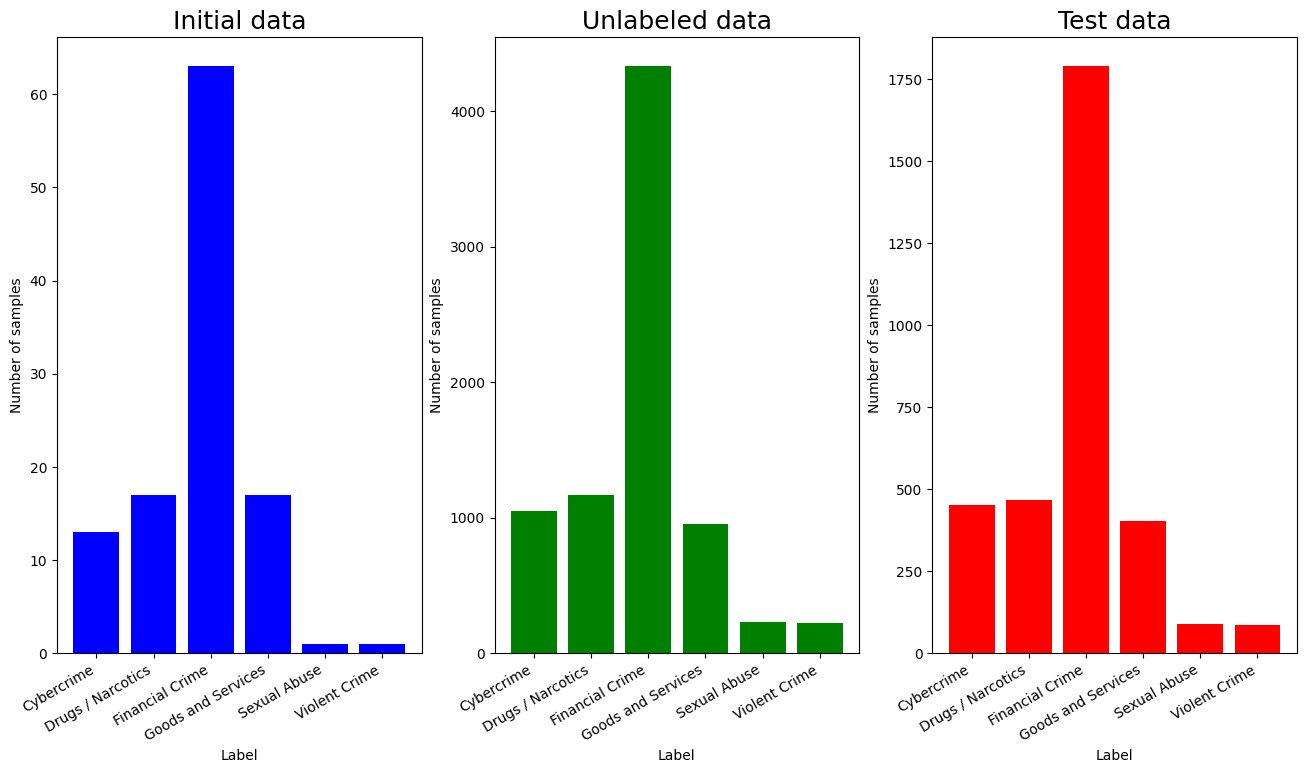

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from src.classification.helpers import split_train_val_test

labels = [
        'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime']
df = pd.read_csv('/home/pablo/active-learning-pablo/data/datasets/cflw_final.csv')
financial_df = df[df['386'] == 1]
non_financial_df = df[df['386'] == 0]
#df = pd.concat([non_financial_df,financial_df.sample(10_000)])
y = df.iloc[:, -len(labels) :].values
X = df.iloc[:, : -len(labels)].values

X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(
        X, y, train_frac=0.7, val_frac=0.01, test_frac=0.29
    )


sum_labels_train = y_train.sum(axis = 0)
sum_labels_test = y_test.sum(axis = 0)
sum_labels_val = y_val.sum(axis = 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
 
# creating the bar plot
ax1.bar(labels, sum_labels_val, color = 'b')
ax1.set(xlabel="Label", ylabel="Number of samples")
ax1.set_title("Initial data", fontsize=18)
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')

ax2.bar(labels, sum_labels_train, color = 'g')
ax2.set(xlabel="Label", ylabel="Number of samples")
ax2.set_title("Unlabeled data",fontsize=18)
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

ax3.bar(labels, sum_labels_test, color = 'r')
ax3.set(xlabel="Label", ylabel="Number of samples")
ax3.set_title("Test data",fontsize=18)
plt.setp(ax3.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.savefig('/home/pablo/active-learning-pablo/data/datasets/statistics/labels.png')

In [12]:
sum_labels_test.sum()

3280.0

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


labels = [
        'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime']

df = pd.read_csv('C:\Users\Pablo\OneDrive\Desktop\Pablo\uni\tfm\code\active-learning-pablo\data\datasets\cflw_final.csv')
X = df.iloc[:, : -len(labels)].values
y = df.iloc[:, -len(labels) :].values

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3774146167.py, line 12)

In [ ]:
number_train = y.sum(axis = 1)
unique_train, counts_train = np.unique(number_train, return_counts=True)

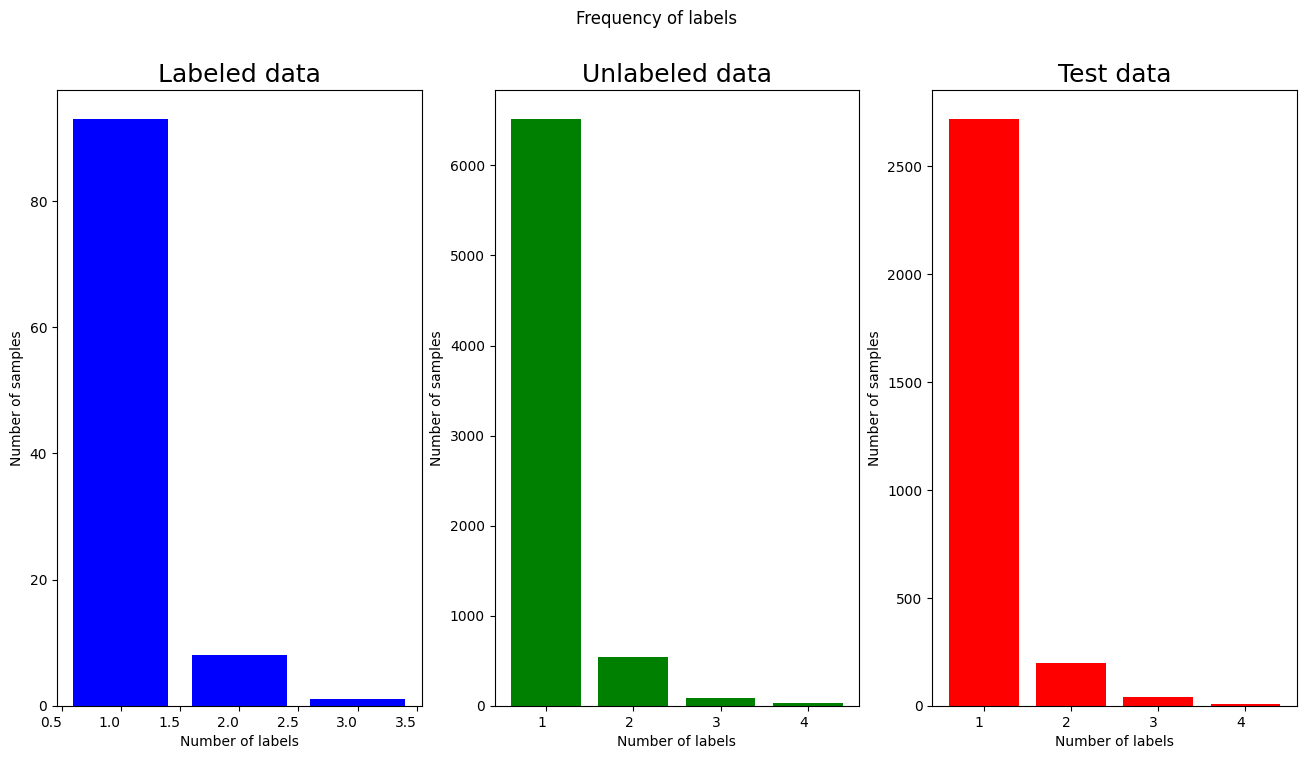

In [2]:
number_train = y_train.sum(axis = 1)
unique_train, counts_train = np.unique(number_train, return_counts=True)
number_test = y_test.sum(axis = 1)
unique_test, counts_test = np.unique(number_test, return_counts=True)
number_val = y_val.sum(axis = 1)
unique_val, counts_val = np.unique(number_val, return_counts=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
 
# creating the bar plot
ax1.bar(unique_val, counts_val, color = 'b')
ax1.set(xlabel="Number of labels", ylabel="Number of samples")
ax1.set_title("Labeled data",fontsize=18)
plt.setp(ax1.get_xticklabels(), rotation=0, horizontalalignment='right')

ax2.bar(unique_train, counts_train, color = 'g')
ax2.set(xlabel="Number of labels", ylabel="Number of samples")
ax2.set_title("Unlabeled data",fontsize=18)
plt.setp(ax2.get_xticklabels(), rotation=0, horizontalalignment='right')

ax3.bar(unique_test, counts_test, color = 'r')
ax3.set(xlabel="Number of labels", ylabel="Number of samples")
ax3.set_title("Test data",fontsize=18)
plt.setp(ax3.get_xticklabels(), rotation=0, horizontalalignment='right')

fig.suptitle("Frequency of labels")
fig.savefig('/home/pablo/active-learning-pablo/data/datasets/statistics/label_counts.png')


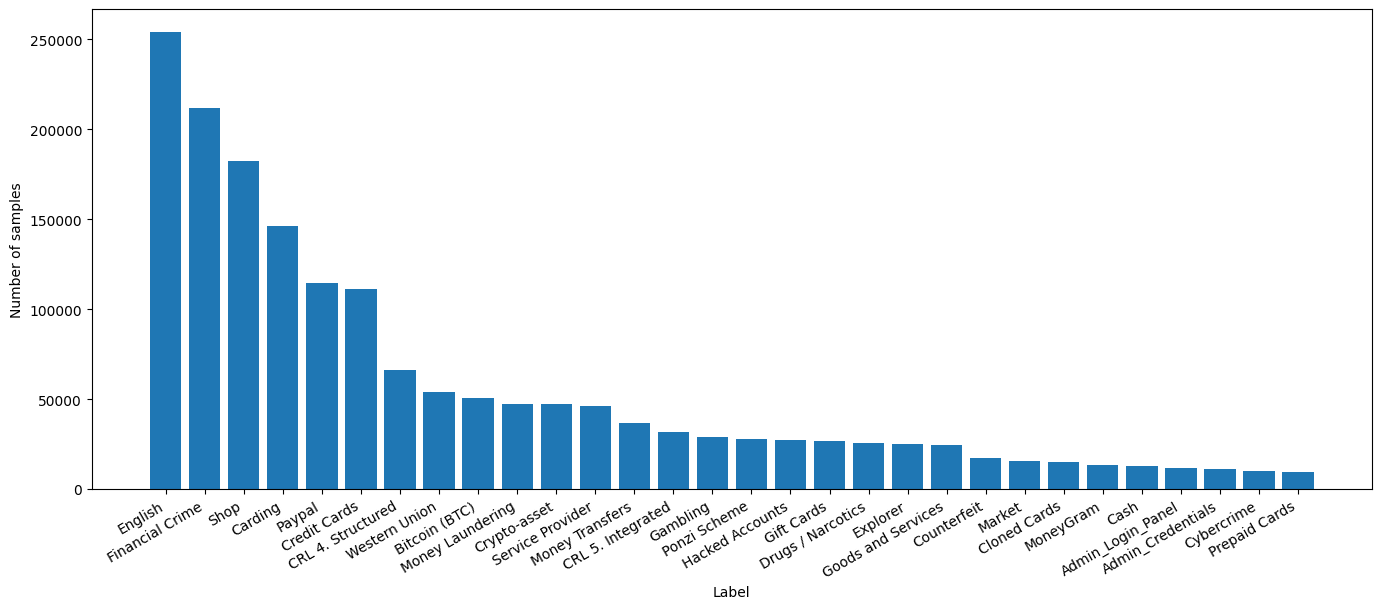

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from src.classification.helpers import split_train_val_test

labels = [
        'Cybercrime',
       'Drugs / Narcotics', 'Financial Crime', 'Goods and Services',
       'Sexual Abuse', 'Violent Crime']

labels = ['English', 'Financial Crime', 'Shop', 'Carding', 'Paypal',
       'Credit Cards', 'CRL 4. Structured', 'Western Union',
       'Bitcoin (BTC)', 'Money Laundering', 'Crypto-asset',
       'Service Provider', 'Money Transfers', 'CRL 5. Integrated',
       'Gambling', 'Ponzi Scheme', 'Hacked Accounts', 'Gift Cards',
       'Drugs / Narcotics', 'Explorer', 'Goods and Services',
       'Counterfeit', 'Market', 'Cloned Cards', 'MoneyGram', 'Cash',
       'Admin_Login_Panel', 'Admin_Credentials', 'Cybercrime',
       'Prepaid Cards']

nr = [3438, 7749, 82808, 7492, 1884, 1160]

nr = [254123, 212016, 182415, 146275, 114570, 111405,  66104,  53929,
        50838,  47331,  47295,  46347,  36445,  31635,  28885,  27829,
        27221,  26879,  25608,  24974,  24229,  17193,  15653,  14921,
        13287,  12696,  11454,  11250,   9757,   9283]
fig = plt.figure()

ax = fig.add_axes([0,0,2,1])

ax.bar(labels,nr)
ax.set(xlabel="Label", ylabel="Number of samples")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()


In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from src.classification.helpers import split_train_val_test

df = pd.read_csv('/home/pablo/active-learning-pablo/data/datasets/script_data_v2.csv')
df.columns.values

array(['Unnamed: 0', 'host_id', 'page_id', 'page_version_id',
       'RelatedTagsArray', 'Cybercrime', 'Drugs / Narcotics',
       'Financial Crime', 'Goods and Services', 'Sexual Abuse',
       'Violent Crime', 'html'], dtype=object)

In [24]:
df['html']
mylen = np.vectorize(len)

unique, counts = np.unique(mylen(df['html']), return_counts=True)

unique_counts = pd.DataFrame()


array([1, 3, 1, ..., 1, 1, 1])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Cybercrime'),
  Text(1.5, 0, 'Drugs / Narcotics'),
  Text(2.5, 0, 'Financial Crime'),
  Text(3.5, 0, 'Goods and Services'),
  Text(4.5, 0, 'Sexual Abuse'),
  Text(5.5, 0, 'Violent Crime')])

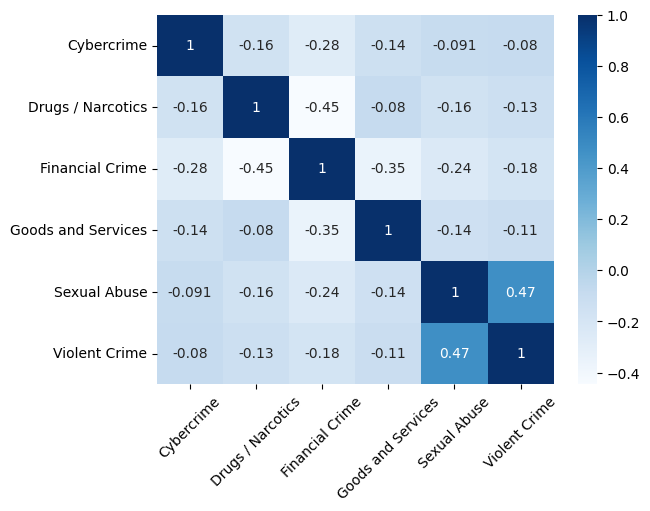

In [17]:
import seaborn as sb

sb.heatmap(np.corrcoef(y_train.T), cmap="Blues", annot=True,xticklabels=labels,
        yticklabels=labels)
plt.xticks(rotation=45)